In [1]:
import os 
os.chdir('../../')
print("Current working directory is now: ", os.getcwd())

import numpy as np 
import pandas as pd 
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import copy

import matplotlib.pyplot as plt 
%matplotlib inline

Current working directory is now:  C:\Users\Feroze\Google Drive\DUKE 2016-2020\psa-analysis


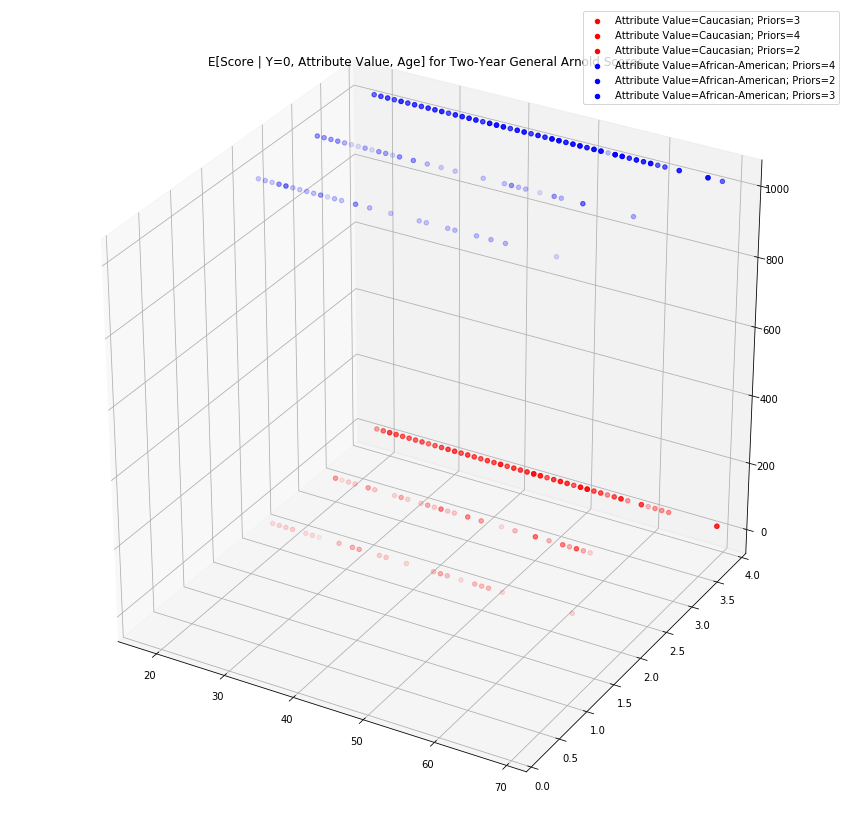

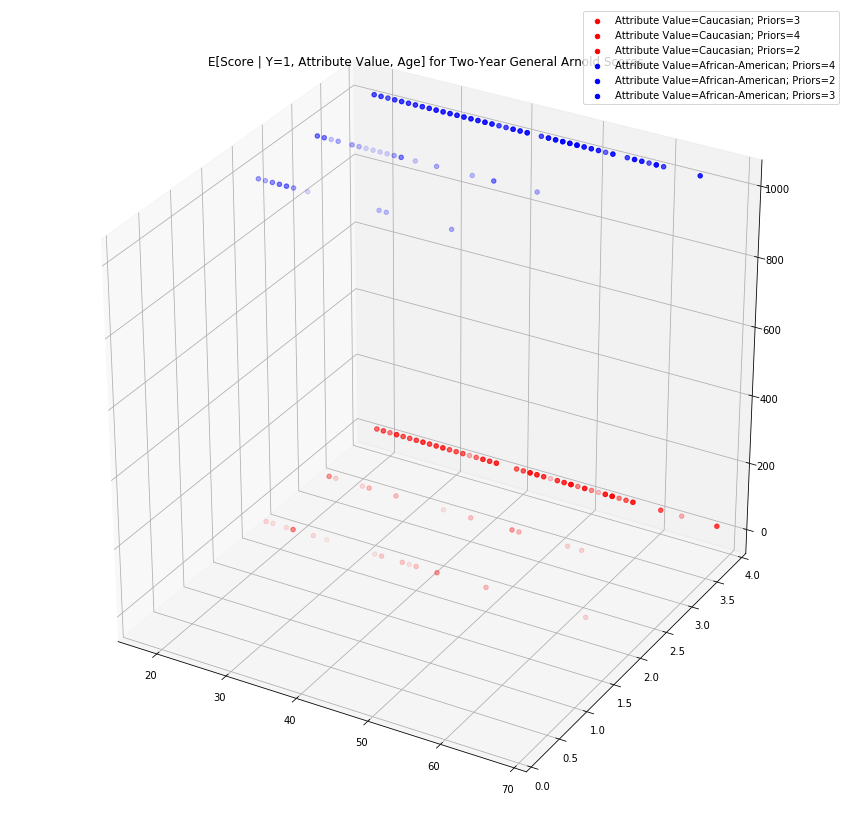

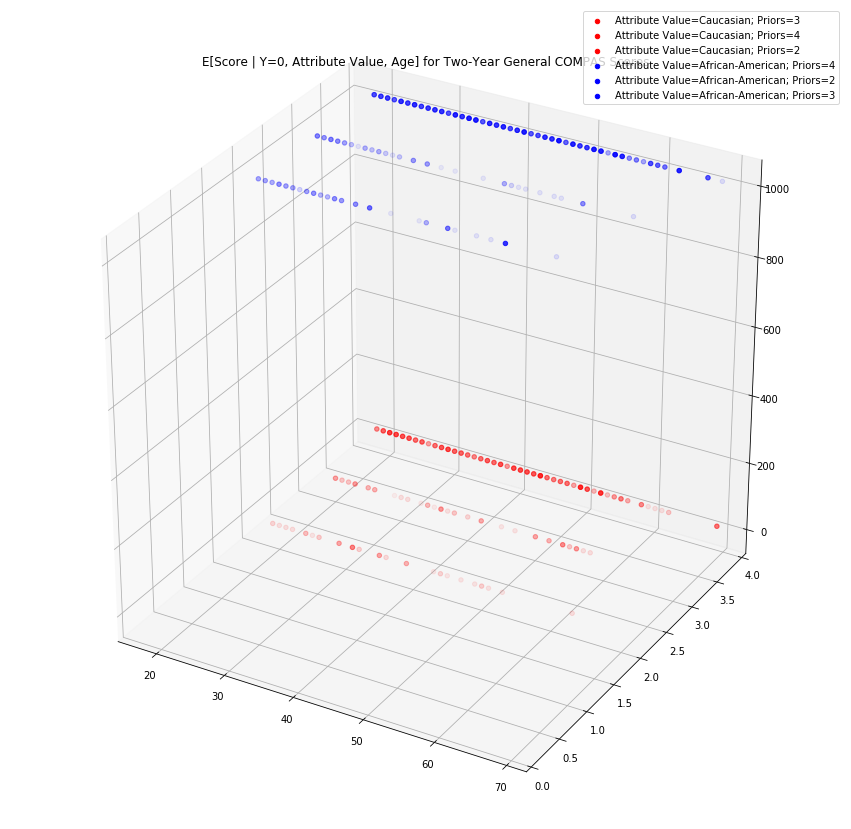

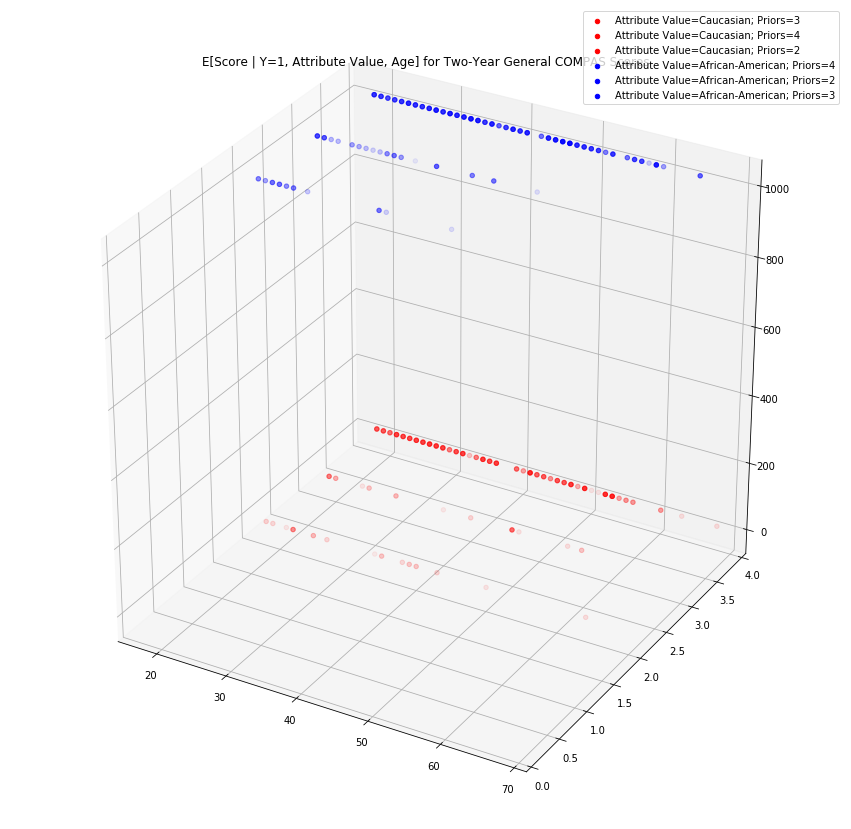

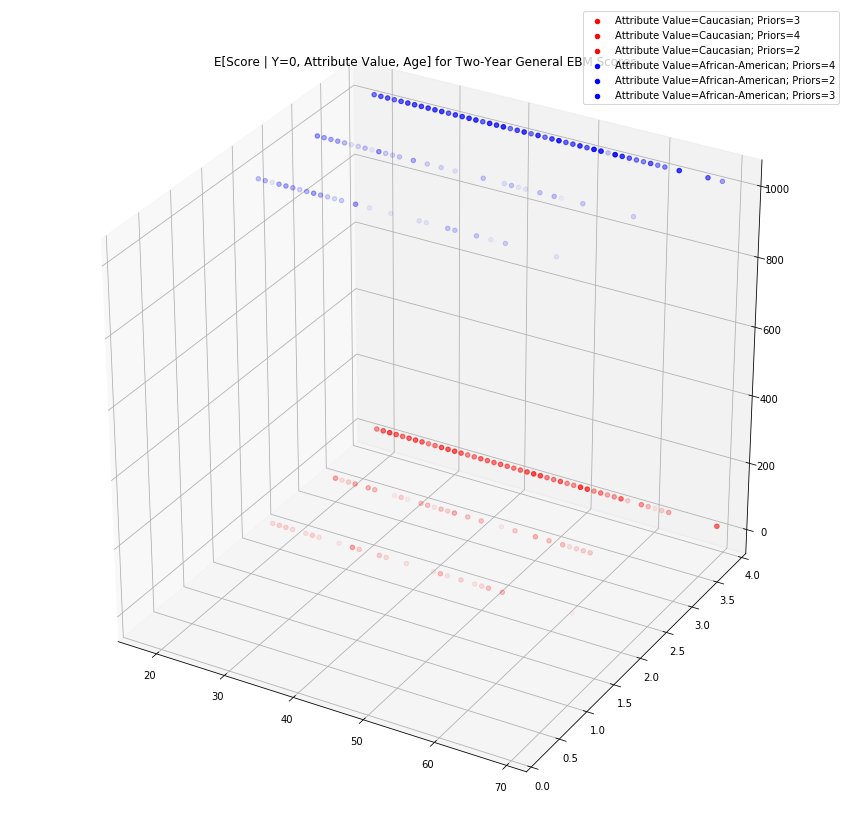

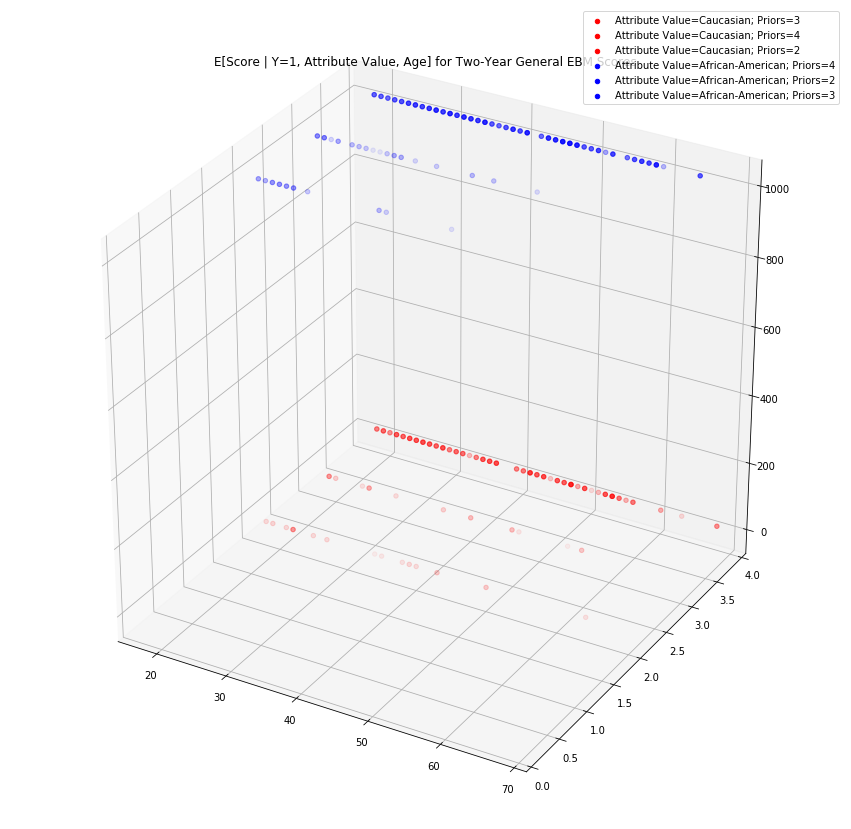

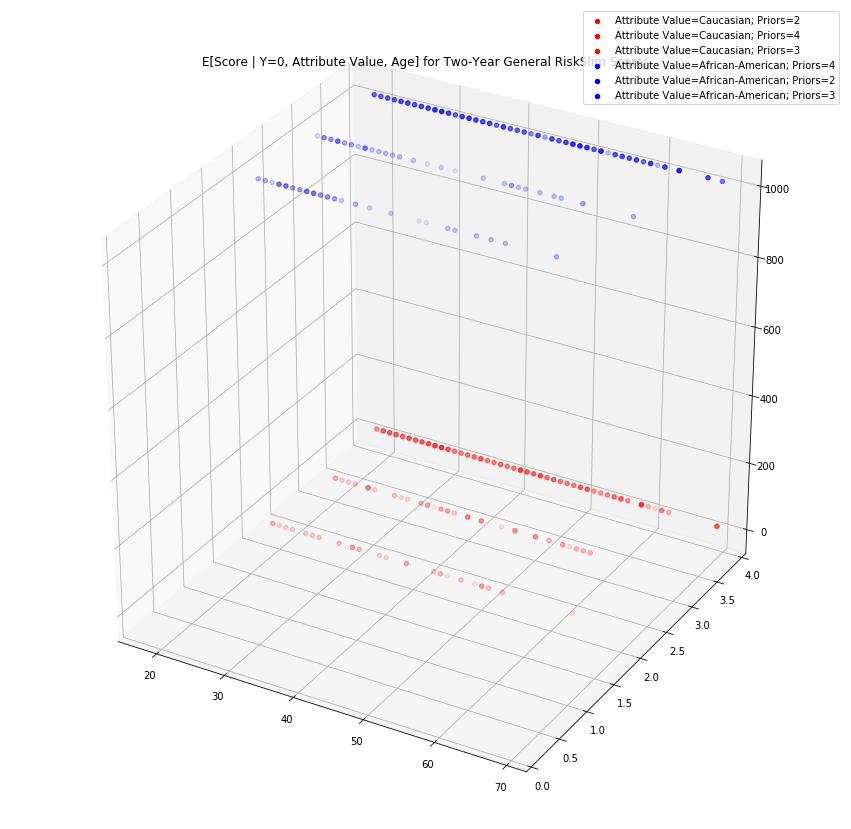

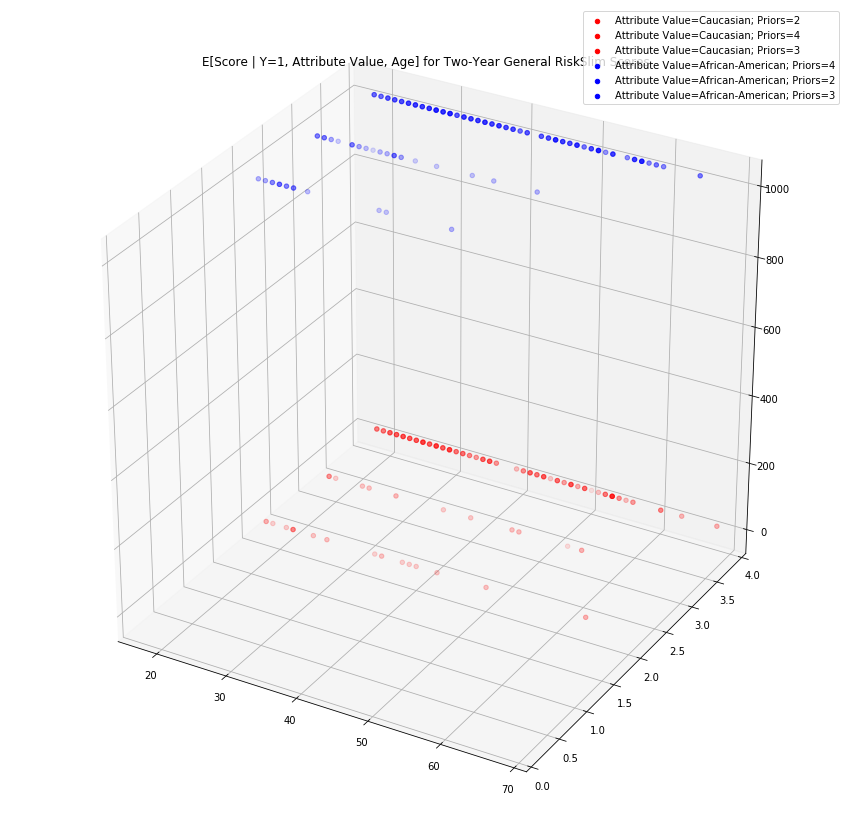

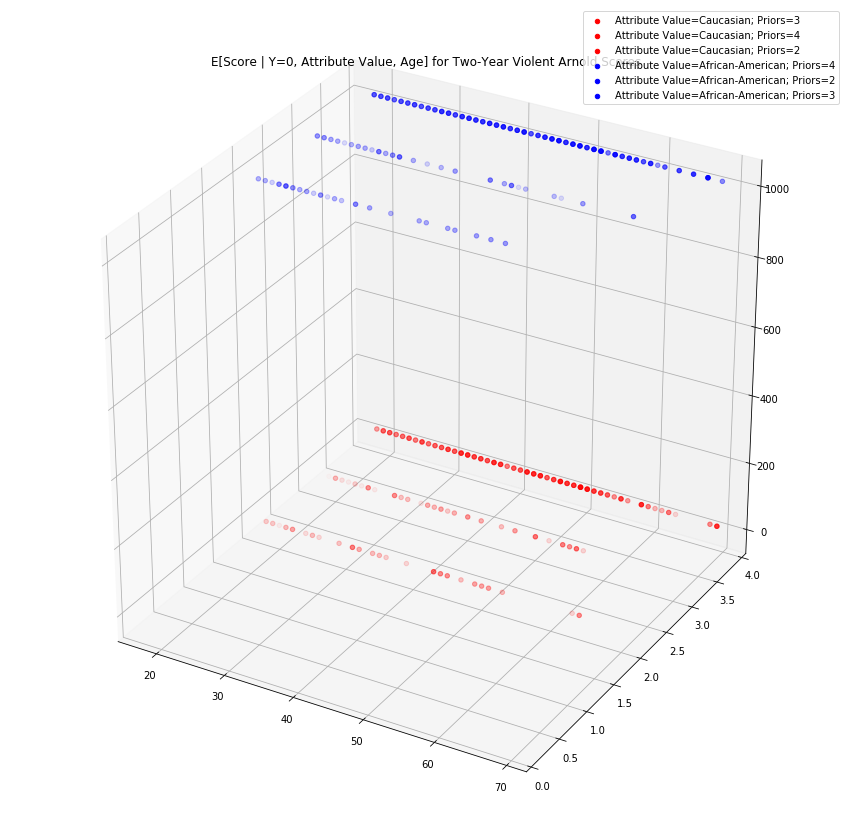

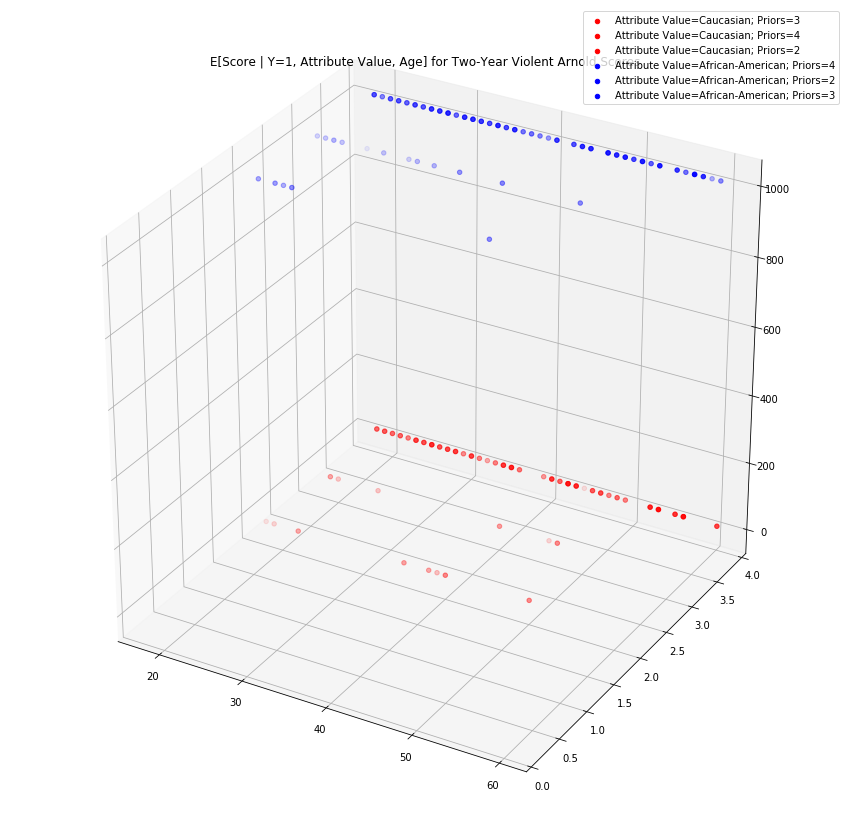

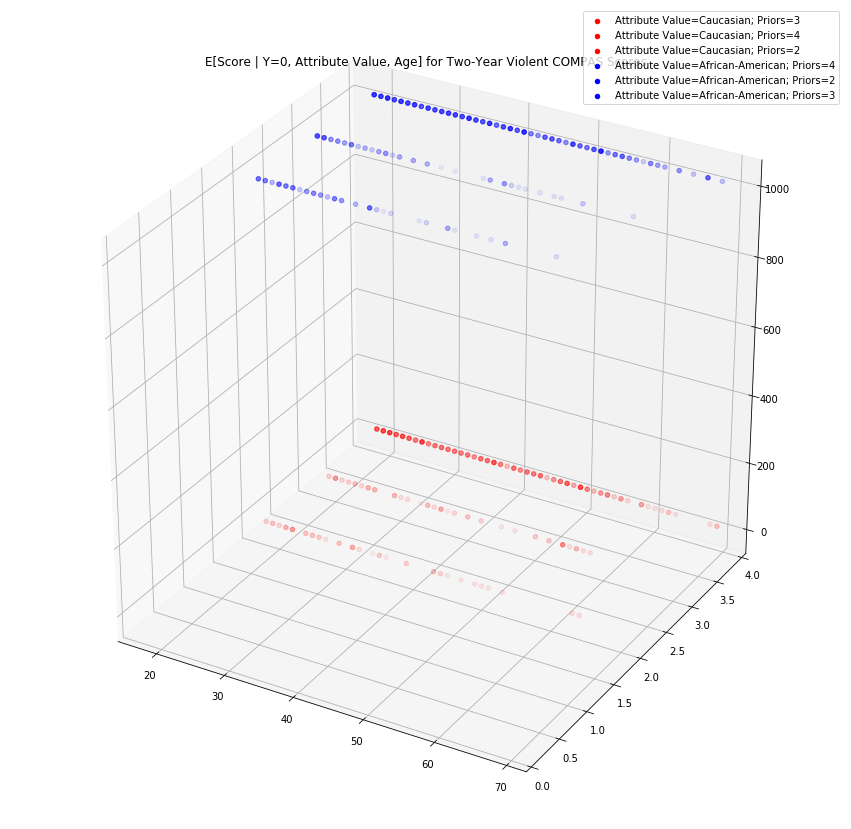

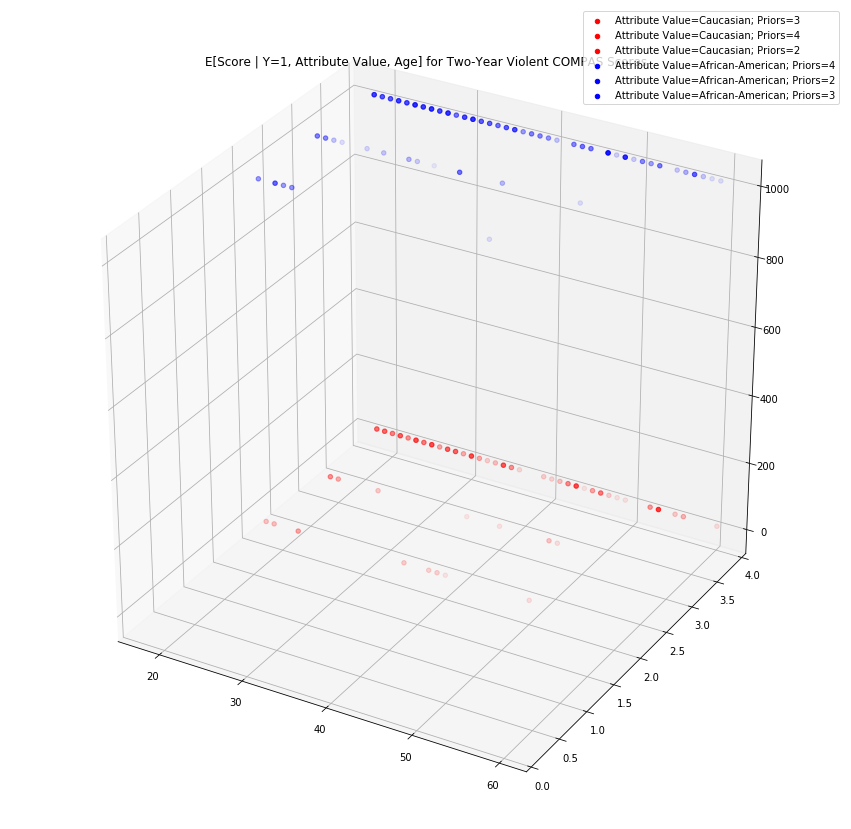

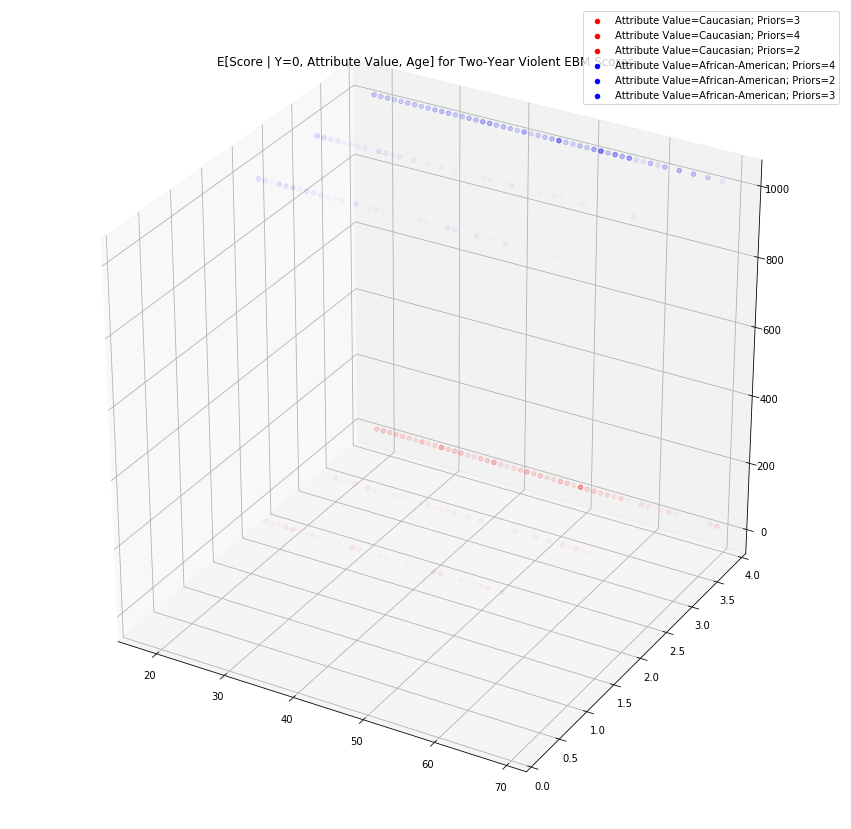

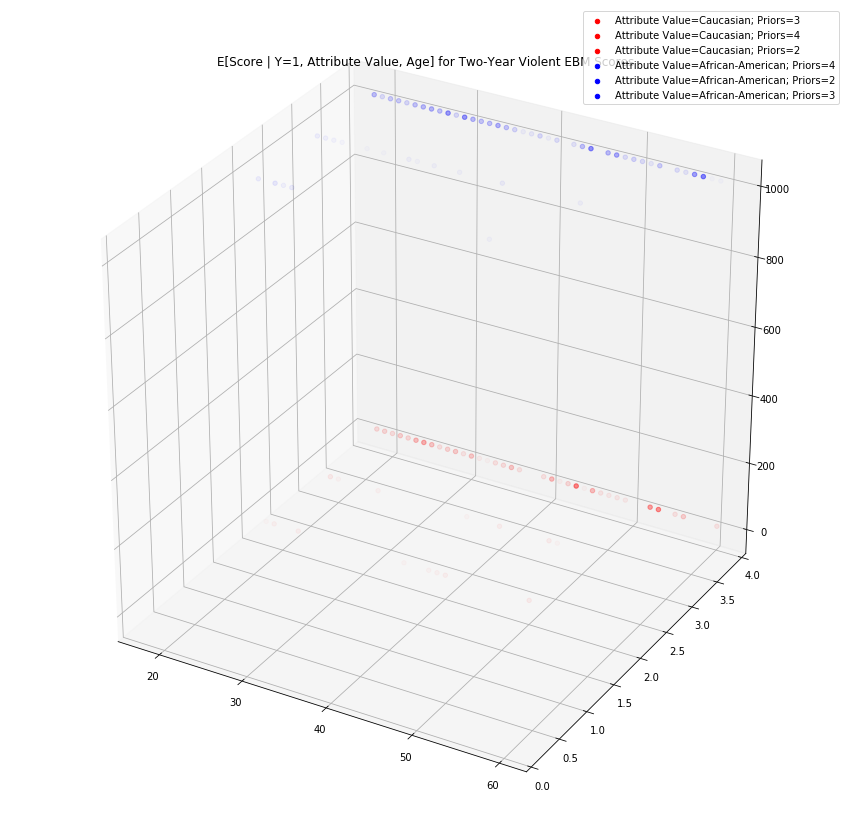

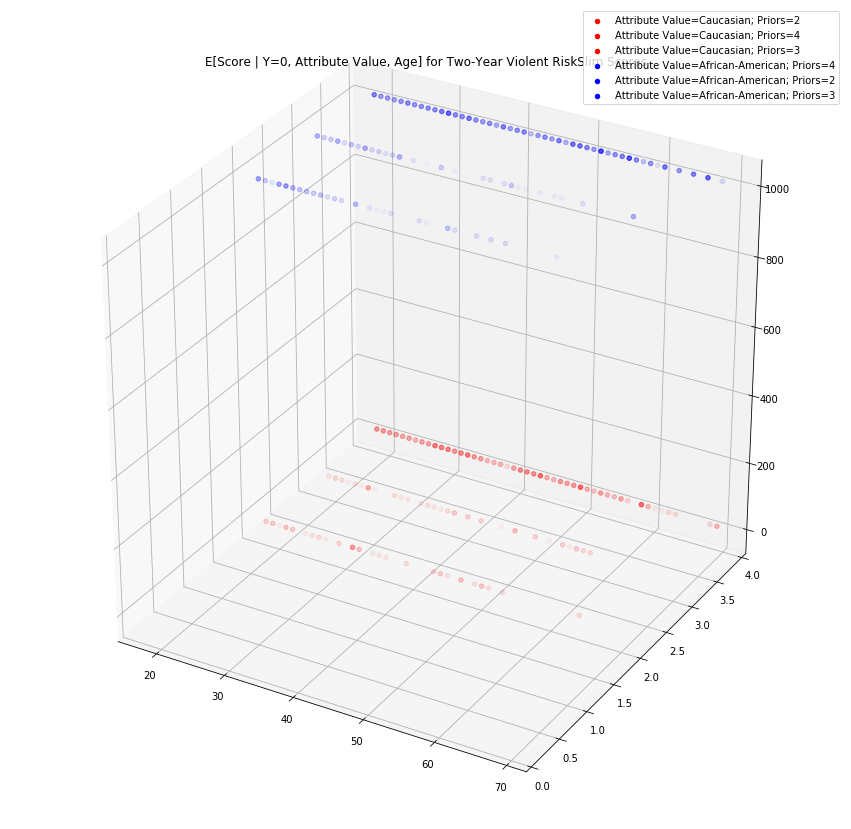

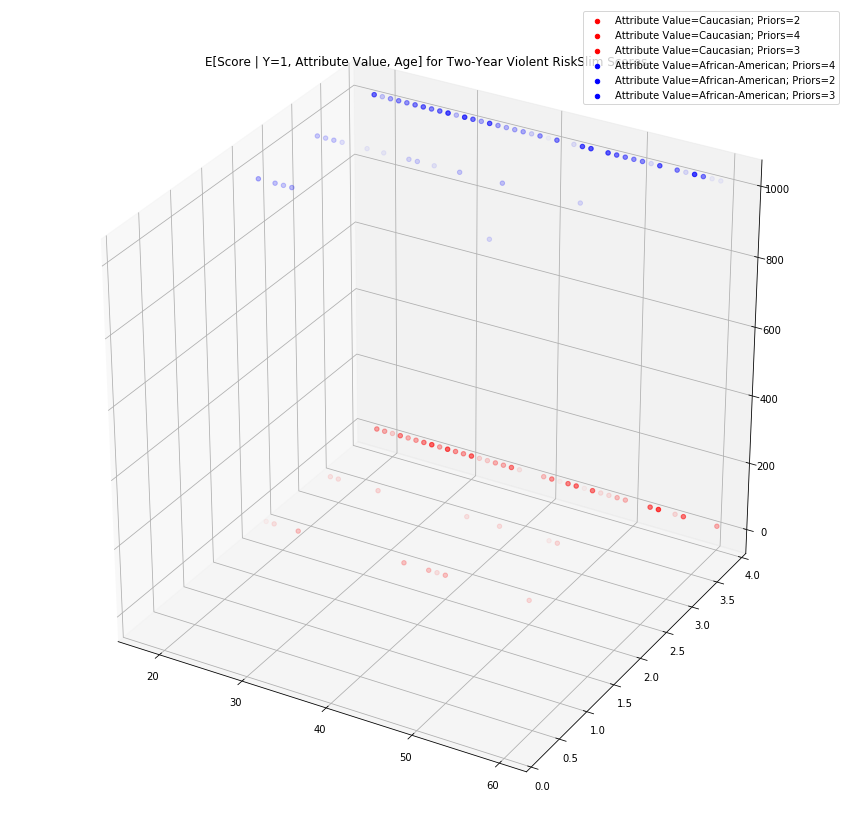

In [28]:
translate_dic = {
    "general/": "General", 
    "violent/": "Violent",
    "arnold_condition_pn": "Arnold Scores",
    "compas_condition_pn": "COMPAS Scores",
    "ebm_condition_pn": "EBM Scores",
    "riskslim_condition_pn": "RiskSlim Scores"
}
rgba_colors1 = np.zeros((10,4))
# for red the first column needs to be one
rgba_colors1[:,0] = 1.0

rgba_colors2 = np.zeros((10,4))
# for red the first column needs to be one
rgba_colors2[:,2] = 1.0


colors = [(0, "red"), (2, "blue")]
axis_limits = [(0, 7), (1, 10), (0, 1), (0, 1)]
# 0-7 = arnold violent
# 0-6 = arnold general
# 1-10 = compas
# 0-1 = ebm
# 0-1 = riskslim
for problem in ["general/", "violent/"]:
    for model, axis_limit in zip(["arnold_condition_pn", "compas_condition_pn", "ebm_condition_pn", "riskslim_condition_pn"], axis_limits):
        temp = pd.read_csv('broward/FL Condition PN/two-year/'+problem+model+'.csv')
        
        negative_labels = temp[temp["Label"]==0]
        fig1 = plt.figure(figsize=(15,15))
        ax1 = fig1.add_subplot(111, projection='3d')
        z = 0
        handles = []
        if problem == "general" and model == "arnold_condition_pn":
            lim = (0, 6)
        else:
            lim = axis_limit
        for attribute, color in zip(["Caucasian", "African-American"], colors):
            for prior in negative_labels["Prior"][negative_labels["Attribute Value"]==attribute].unique():
                x = negative_labels["Age"][(negative_labels["Attribute Value"]==attribute) & (negative_labels["Prior"]==prior)]
                y = [prior]*len(x)
                alphas = []
                for val in negative_labels["Expected Score"][(negative_labels["Attribute Value"]==attribute) & (negative_labels["Prior"]==prior)]:
                    alphas.append(val/lim[1])
                    
                rgba_colors = np.zeros((len(alphas),4))
                # for red the first column needs to be one
                rgba_colors[:,color[0]] = 1.0
                # the fourth column needs to be your alphas
                rgba_colors[:, 3] = alphas
                
                h = ax1.scatter(x, y, [z]*len(x), label="Attribute Value="+attribute+"; Priors="+str(prior), color=rgba_colors)
                h.set_color(color[1])
                handles.append(copy.copy(h))
            z += 1000

        ax1.legend(handles=handles)
        ax1.set_ylim(0, 4)
        if problem == "violent" and model == "arnold_condition_pn":
            title = "E[Score | Y=0, Attribute Value, Age] for Two-Year Arnold NVCA Raw"
        else:
            title = 'E[Score | Y=0, Attribute Value, Age] for Two-Year '+ translate_dic[problem]+ ' ' + translate_dic[model]
        ax1.set_title(title)

        positive_labels = temp[temp["Label"]==1]
        fig2 = plt.figure(figsize=(15,15))
        ax2 = fig2.add_subplot(111, projection='3d')
        z = 0
        secondhandles = []
        if problem == "general" and model == "arnold_condition_pn":
            lim = (0, 6)
        else:
            lim = axis_limit
        for attribute, color in zip(["Caucasian", "African-American"], colors):
            for prior in positive_labels["Prior"][positive_labels["Attribute Value"]==attribute].unique():
                x = positive_labels["Age"][(positive_labels["Attribute Value"]==attribute) & (positive_labels["Prior"]==prior)]
                y = [prior]*len(x)
                alphas = []
                for val in positive_labels["Expected Score"][(positive_labels["Attribute Value"]==attribute) & (positive_labels["Prior"]==prior)]:
                    alphas.append(val/lim[1])
                
                rgba_colors = np.zeros((len(alphas),4))
                # for red the first column needs to be one
                rgba_colors[:,color[0]] = 1.0
                # the fourth column needs to be your alphas
                rgba_colors[:, 3] = alphas
                
                h = ax2.scatter(x, y, [z]*len(x), label="Attribute Value="+attribute+"; Priors="+str(prior), color=rgba_colors)
                h.set_color(color[1])
                secondhandles.append(copy.copy(h))
            z += 1000
        

        ax2.legend(handles=handles)
        ax2.set_ylim(0,4)
        if problem == "violent" and model == "arnold_condition_pn":
            title = "E[Score | Y=1, Attribute Value, Age] for Two-Year Arnold NVCA Raw"
        else:
            title = 'E[Score | Y=1, Attribute Value, Age] for Two-Year '+ translate_dic[problem]+ ' ' + translate_dic[model]
        ax2.set_title(title)
